## K-means project

In [12]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install seaborn


[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 5.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 87.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.1/944.1 kB 26.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 56.8 MB/s eta 0:00:00:00:01

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip


In [31]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import decomposition

In [3]:
# Read data
url='https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
df_raw = pd.read_csv(url)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df_raw.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df = df_raw.copy()

In [7]:
df = df[['Latitude', 'Longitude', 'MedInc']]

In [8]:
df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [9]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['Latitude', 'Longitude', 'MedInc']])
df_scale = pd.DataFrame(scale, columns = ['Latitude', 'Longitude', 'MedInc']);
df_scale.head(5)

,Latitude,Longitude,MedInc
0,0.567481,0.211155,0.539668
1,0.565356,0.212151,0.538027
2,0.564293,0.210159,0.466028
3,0.564293,0.209163,0.354699
4,0.564293,0.209163,0.230776


In [20]:
# Elbow method to select number of clusters
# Source: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f 
# For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples 
# to the nearest cluster centre

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scale)
    Sum_of_squared_distances.append(km.inertia_)

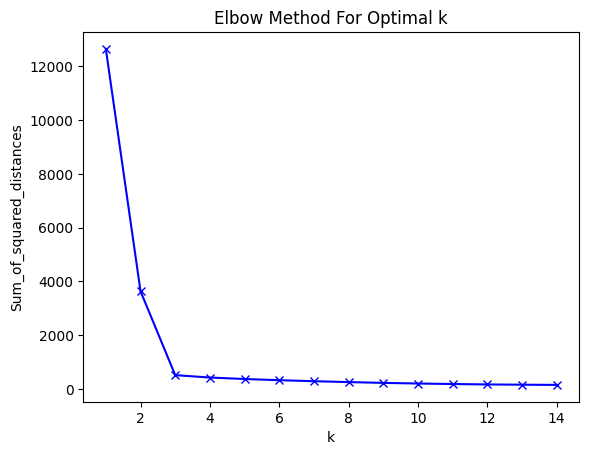

In [23]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow seems to be at k=3. 

In [24]:
kmeans = KMeans(init="random",n_clusters=3, random_state=0, n_init=10,max_iter=300)

kmeans.fit(df_scale)

df_scale['Cluster'] = kmeans.predict(df_scale) # it is the same as kmeans.labels_

df_scale

,Latitude,Longitude,MedInc,Cluster
0,0.567481,0.211155,0.539668,2
1,0.565356,0.212151,0.538027,2
2,0.564293,0.210159,0.466028,2
3,0.564293,0.209163,0.354699,2
4,0.564293,0.209163,0.230776,2
...,...,...,...,...
20635,0.737513,0.324701,0.073130,2
20636,0.738576,0.312749,0.141853,2
20637,0.732200,0.311753,0.082764,2
20638,0.732200,0.301793,0.094295,2


In [25]:
df_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
 3   Cluster    20640 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 564.5 KB


In [26]:
df_scale['Cluster'] = pd.Categorical(df_scale.Cluster)

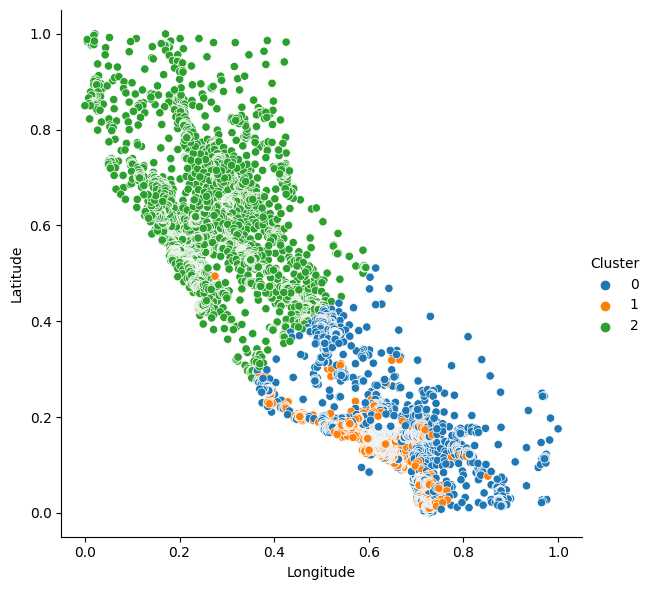

In [27]:
sns.relplot(x="Longitude", y="Latitude", hue="Cluster", data=df_scale, height=6)

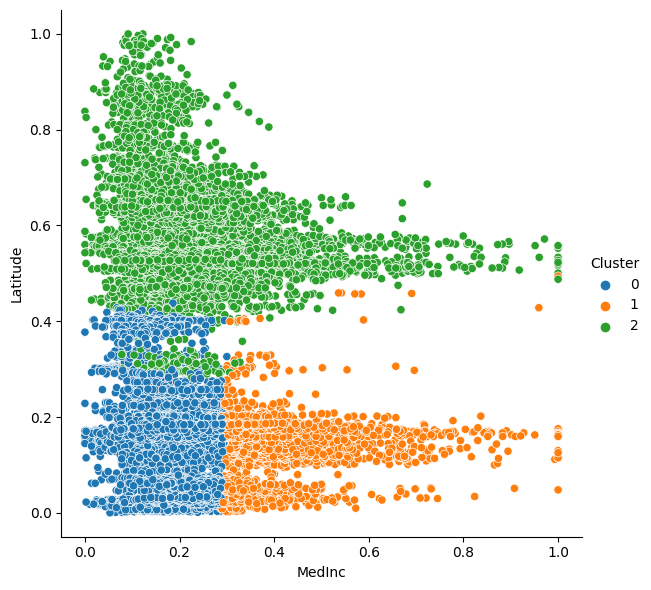

In [28]:
sns.relplot(x="MedInc", y="Latitude", hue="Cluster", data=df_scale, height=6)

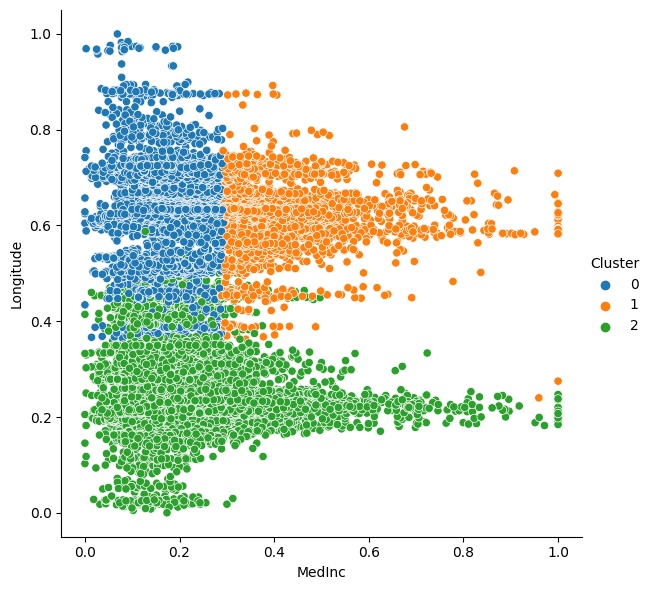

In [29]:
sns.relplot(x="MedInc", y="Longitude", hue="Cluster", data=df_scale, height=6)

<AxesSubplot:>

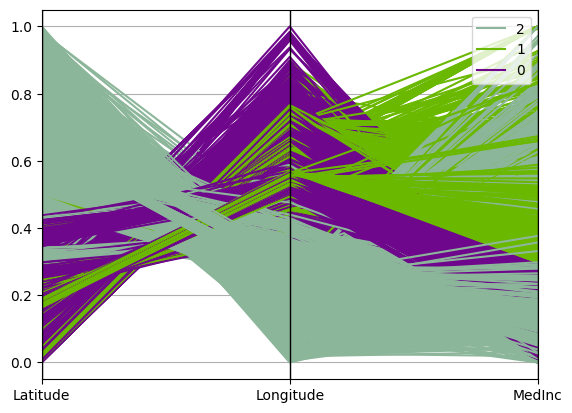

In [30]:
pd.plotting.parallel_coordinates(df_scale, 'Cluster')

In [32]:
# Apply PCA to latitude and longitude 

X = df_scale[['Latitude', 'Longitude']]

pca = decomposition.PCA(n_components=2)

pca.fit(X)

X_prime = pca.transform(X)



In [33]:
print(pca.explained_variance_ratio_)

[0.96297504 0.03702496]


In [35]:
df_pca = pd.DataFrame(data = X_prime
             , columns = ['pca_1', 'pca_2'])

In [36]:
# Add pca_1 of latitude and longitude to df_scaled

df_scale['pca_1'] = df_pca['pca_1']

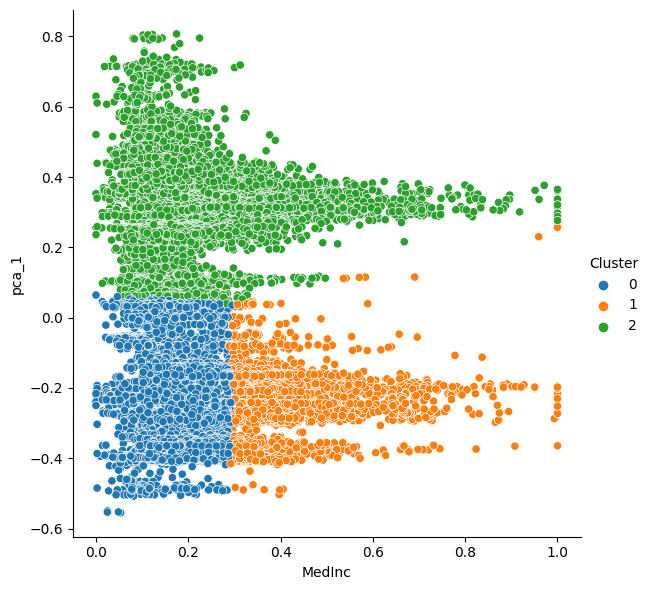

In [37]:
# Plot the first pca of latitude and longitude vs MedInc

sns.relplot(x="MedInc", y="pca_1", hue="Cluster", data=df_scale, height=6)